In [ ]:
from tradingview_ta import TA_Handler, Interval

In [ ]:
def tradingview_recommendation(symbol, market):
    """
    Retrieves the tradingview recommendation for the given symbol and market.

    Parameters:
    symbol (str): The symbol for which the recommendation is being retrieved.
    market (str): The market in which the symbol is being traded.

    Returns:
    list: A list containing the summary, moving averages, and oscillators recommendations.
    """
    if market == "india":
        screener = "india"
        exchange = "NSE"
    else:
        screener = "america"
    try:
        if market == "america":
            try:
                symbol_handler = TA_Handler(
                    symbol=symbol,
                    screener=screener,
                    exchange="NYSE",
                    interval=Interval.INTERVAL_1_WEEK,
                )
                analysis = symbol_handler.get_analysis()
                summary = analysis.summary['RECOMMENDATION']
                moving_averages = analysis.moving_averages['RECOMMENDATION']
                oscillators = analysis.oscillators['RECOMMENDATION']
                if summary:  # Check if a result is obtained
                    return [summary, moving_averages, oscillators]
            except Exception as e:
                symbol_handler = TA_Handler(
                    symbol=symbol,
                    screener=screener,
                    exchange="NASDAQ",
                    interval=Interval.INTERVAL_1_WEEK,
                )
                analysis = symbol_handler.get_analysis()
                summary = analysis.summary['RECOMMENDATION']
                moving_averages = analysis.moving_averages['RECOMMENDATION']
                oscillators = analysis.oscillators['RECOMMENDATION']
                if summary:  # Check if a result is obtained
                    return [summary, moving_averages, oscillators]
        else:
            symbol_handler = TA_Handler(
                symbol=symbol,
                screener=screener,
                exchange=exchange,
                interval=Interval.INTERVAL_1_WEEK,
            )
            analysis = symbol_handler.get_analysis()
            summary = analysis.summary['RECOMMENDATION']
            moving_averages = analysis.moving_averages['RECOMMENDATION']
            oscillators = analysis.oscillators['RECOMMENDATION']
            return [summary, moving_averages, oscillators]
    except Exception as e:
        return['N_A', 'N_A', 'N_A']
    
symbols_list = ["TSLA", "MSFT", "AAPL", "AMZN", "GOOG", "META", "FB"]

for symbol in symbols_list:
    print(tradingview_recommendation(symbol, "america"))

In [ ]:
def tradingview_recommendation(symbol, market):
    """
    Retrieves the tradingview recommendation for the given symbol and market.

    Parameters:
    symbol (str): The symbol to retrieve the recommendation for.
    market (str): The market where the symbol is traded.

    Returns:
    list: A list containing the summary, moving averages, and oscillators recommendations.
    """
    screener = "india" if market == "india" else "america"
    exchange = "NSE" if market == "india" else "NYSE"

    try:
        handler = TA_Handler(
            symbol=symbol,
            screener=screener,
            exchange=exchange,
            interval=Interval.INTERVAL_1_WEEK,
        )
        analysis = handler.get_analysis()
        recommendation_summary = analysis.summary.get('RECOMMENDATION', 'N_A')
        moving_averages = analysis.moving_averages.get('RECOMMENDATION', 'N_A')
        oscillators = analysis.oscillators.get('RECOMMENDATION', 'N_A')
        return [recommendation_summary, moving_averages, oscillators]
    except Exception:
        return ['N_A', 'N_A', 'N_A']
    
symbols_list = ["TSLA", "MSFT", "AAPL", "AMZN", "GOOG", "META", "FB"]

for symbol in symbols_list:
    print(tradingview_recommendation(symbol, "america"))    

In [ ]:
def tradingview_recommendation(symbol, market):
    """
    Retrieves the tradingview recommendation for the given symbol and market.

    Parameters:
    symbol (str): The symbol to retrieve the recommendation for.
    market (str): The market where the symbol is traded.

    Returns:
    list: A list containing the summary, moving averages, and oscillators recommendations.
    """
    screener = "india" if market == "india" else "america"
    exchange = "NSE" if market == "india" else None

    try:
        handler = TA_Handler(
            symbol=symbol,
            screener=screener,
            exchange="NASDAQ",
            interval=Interval.INTERVAL_1_DAY,
        )
        analysis = handler.get_analysis()
        print("Test")
        recommendation_summary = analysis.summary.get('RECOMMENDATION', 'N_A')
        moving_averages = analysis.moving_averages.get('RECOMMENDATION', 'N_A')
        oscillators = analysis.oscillators.get('RECOMMENDATION', 'N_A')
        return [recommendation_summary, moving_averages, oscillators]
    except Exception as e:
        print(e)
        return ['N_A', 'N_A', 'N_A']
    
symbols_list = ["FSLR", "WBA", "KLAC", "MPWR", "LULU", "CSCO", "HOLX", "TRIP"]

for symbol in symbols_list:
    print(tradingview_recommendation(symbol, "america"))   

In [12]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np

data = yf.download("RCF.NS", start="2022-01-01", end="2024-04-24")
data = data.dropna()
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,137.350006,142.800003,137.300003,140.649994,140.649994,2148877
2024-04-18,141.000000,143.399994,138.399994,138.850006,138.850006,1594394
2024-04-19,136.199997,140.000000,134.300003,138.449997,138.449997,2065488
2024-04-22,139.800003,145.449997,138.899994,144.850006,144.850006,3610234
2024-04-23,145.699997,145.750000,143.149994,143.800003,143.800003,1675420


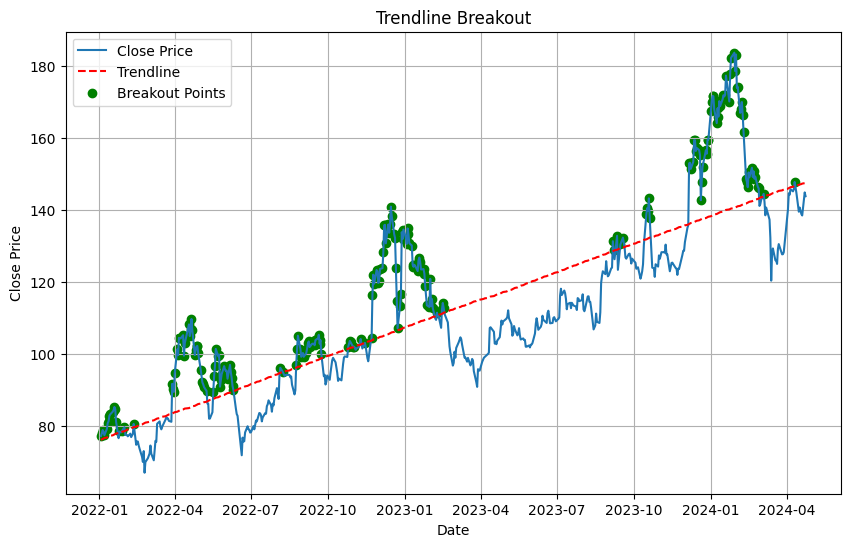

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate trendline using linear regression
slope, intercept = np.polyfit(range(len(data)), data['Close'], 1)
trendline = intercept + slope * range(len(data))

# Detect breakout points
breakout_points = data[data['Close'] > trendline]

# Plot the data and trendline
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, trendline, color='r', linestyle='--', label='Trendline')
plt.scatter(breakout_points.index, breakout_points['Close'], color='g', label='Breakout Points')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Trendline Breakout')
plt.legend()
plt.grid(True)
plt.show()

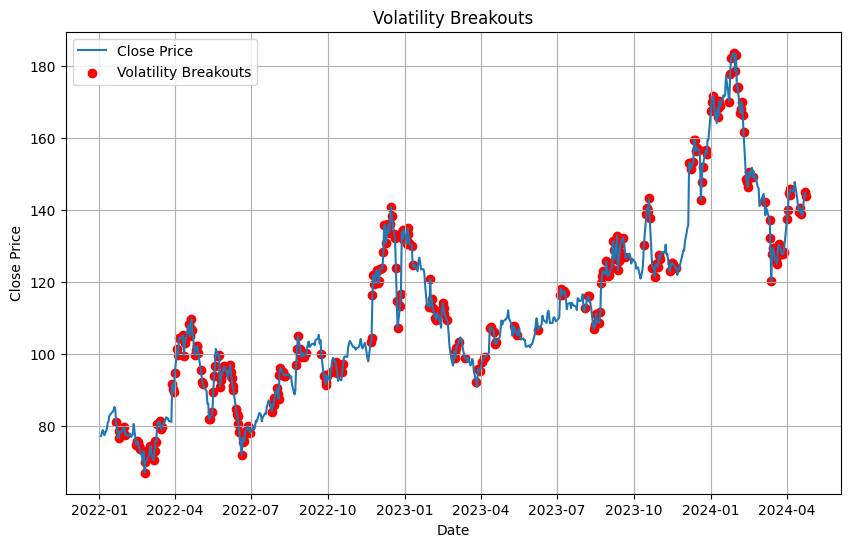

In [18]:
# Calculate historical volatility
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log Returns'].rolling(window=5).std() * np.sqrt(252)

# Define volatility threshold
volatility_threshold = 0.3

# Find volatility breakouts
volatility_breakouts = data[data['Volatility'] > volatility_threshold]

# Plot the data and volatility breakouts
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(volatility_breakouts.index, volatility_breakouts['Close'], color='r', label='Volatility Breakouts')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Volatility Breakouts')
plt.legend()
plt.grid(True)
plt.show()